## Crisis Alpha

- 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ta.volatility import bollinger_hband, bollinger_lband, bollinger_mavg, bollinger_pband, bollinger_wband, bollinger_hband_indicator, bollinger_lband_indicator
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2020-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [10]:
hband = bollinger_hband(
    close = data['Close'],
    window = 20,
    window_dev = 2,
    fillna = False
)

lband = bollinger_lband(
    close = data['Close'],
    window = 20,
    window_dev = 2,
    fillna = False
)

hband_indicator = bollinger_hband_indicator(
    close = data['Close'],
    window = 20,
    window_dev = 2,
    fillna = False
)

lband_indicator = bollinger_lband_indicator(
    close = data['Close'],
    window = 20,
    window_dev = 2,
    fillna = False
)

mband = bollinger_mavg(
    close = data['Close'],
    window = 20,
    fillna = False
)

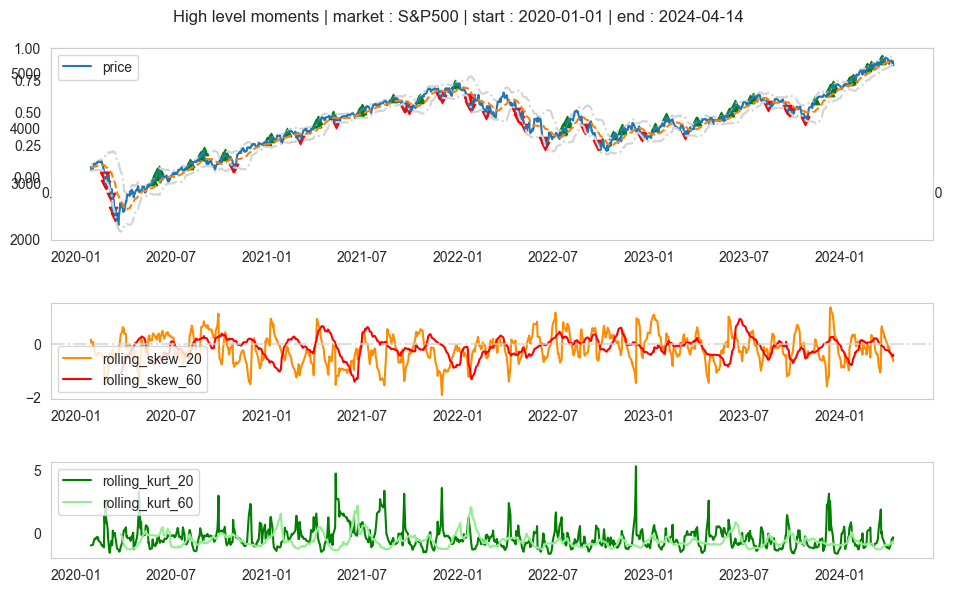

In [50]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(hband, color = 'lightgray', ls = '-.')
plt.plot(data['Close'][19:], label = 'price')
plt.plot(mband, ls = '--')
plt.plot(lband, color = 'lightgray', ls = '-.')
plt.scatter(
    hband_indicator[hband_indicator == 1].index,
    data['Close'].loc[hband_indicator[hband_indicator == 1].index],
    color = 'green',
    marker = '^'
)
plt.scatter(
    lband_indicator[lband_indicator == 1].index,
    data['Close'].loc[lband_indicator[lband_indicator == 1].index],
    color = 'red',
    marker = 'v'
)
plt.legend()
plt.grid(False)

plt.subplot(gs[1])
plt.plot(data['Close'].rolling(window = 20).skew(), color = 'darkorange')
plt.plot(data['Close'].rolling(window = 60).skew(), color = 'red')
plt.grid(False)
plt.axhline(y = 0, color = 'lightgray', linestyle = '-.', alpha = 0.75)
plt.legend(['rolling_skew_20', 'rolling_skew_60'])

plt.subplot(gs[2])
plt.plot(data['Close'].rolling(window = 20).kurt(), color = 'green')
plt.plot(data['Close'].rolling(window = 60).kurt(), color = 'lightgreen')
plt.grid(False)
plt.legend(['rolling_kurt_20', 'rolling_kurt_60'])

plt.suptitle(f'High level moments | market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()

In [28]:
def bollinger_sqaure(data, window, width_factor = 2):
    data['Moving Average'] = data['Close'].rolling(window=window).mean()
    data['Standard Deviation'] = data['Close'].rolling(window=window).std()

    data['Kurtosis'] = data['Close'].rolling(window=window).kurt()

    data['Band Width'] = width_factor * (1 + data['Kurtosis'])
    
    data['Upper Band'] = data['Moving Average'] + (data['Band Width'] * data['Standard Deviation'])
    data['Lower Band'] = data['Moving Average'] - (data['Band Width'] * data['Standard Deviation'])
    
    return data

In [31]:
bs = bollinger_sqaure(data, window = 20, width_factor = 2)

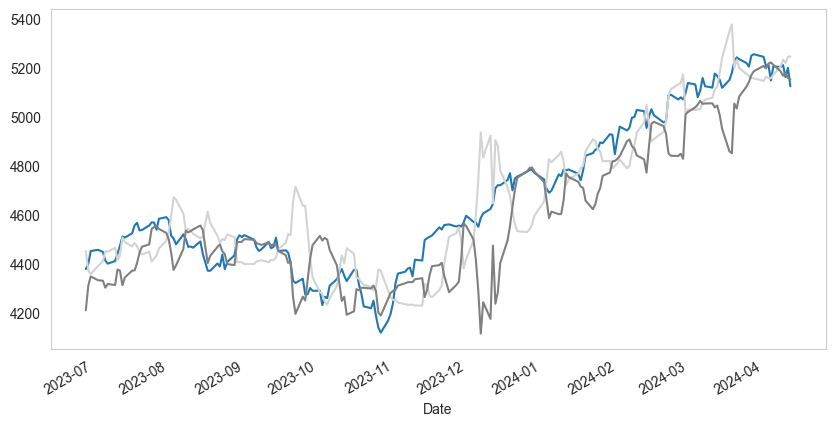

In [37]:
data['Close'][-200:].plot(figsize = (10, 5))
bs['Upper Band'][-200:].plot(color = 'lightgray')
bs['Lower Band'][-200:].plot(color = 'gray')

plt.grid(False)

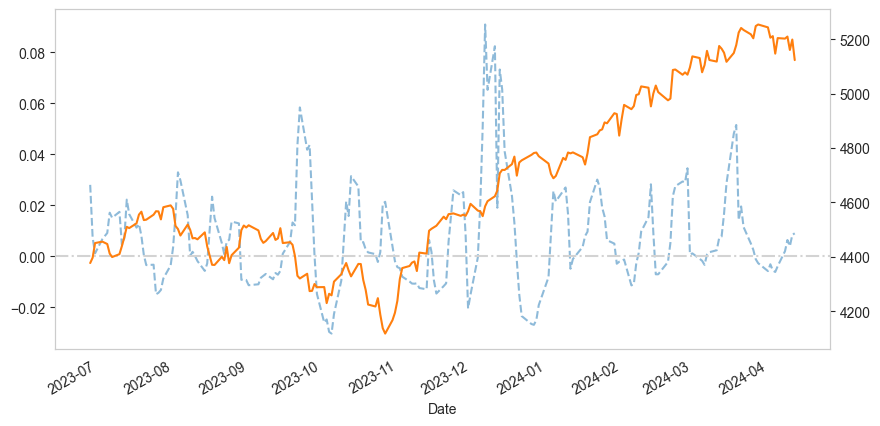

In [47]:
((bs['Upper Band'] - bs['Lower Band']) / (bs['Upper Band'] + bs['Lower Band']))[-200:].plot(figsize = (10, 5), grid = False, alpha = 0.5, ls = '--')
plt.axhline(y=0, color = 'lightgray', ls = '-.')
data['Close'][-200:].plot(figsize = (10, 5), secondary_y = True)
plt.show()